In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [2]:
dataset = pd.read_csv("F:avocado.csv")

In [3]:
dataset

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
dataset.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
dataset = pd.DataFrame(data = dataset)

In [6]:
dataset.shape

(18249, 14)

In [7]:
dataset.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [9]:
dataset.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

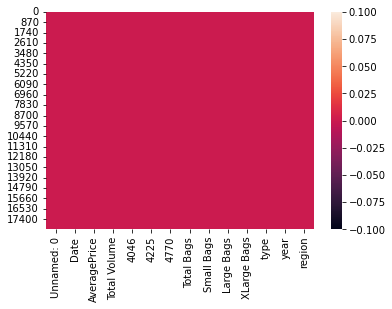

In [10]:
sns.heatmap(dataset.isnull())

In [11]:
dataset.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [12]:
dataset["AveragePrice"].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [13]:
dataset["Date"]

0        2015-12-27
1        2015-12-20
2        2015-12-13
3        2015-12-06
4        2015-11-29
            ...    
18244    2018-02-04
18245    2018-01-28
18246    2018-01-21
18247    2018-01-14
18248    2018-01-07
Name: Date, Length: 18249, dtype: object

In [14]:
from datetime import datetime

In [15]:
dataset['year'] = pd.DatetimeIndex(dataset['Date']).year
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [16]:
dataset['month'] = pd.DatetimeIndex(dataset['Date']).month
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [17]:
dataset['month'] = pd.DatetimeIndex(dataset['Date']).day
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29


In [18]:
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29


In [19]:
dataset.drop("Date",axis="columns",inplace=True)

In [20]:
dataset.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29


<AxesSubplot:>

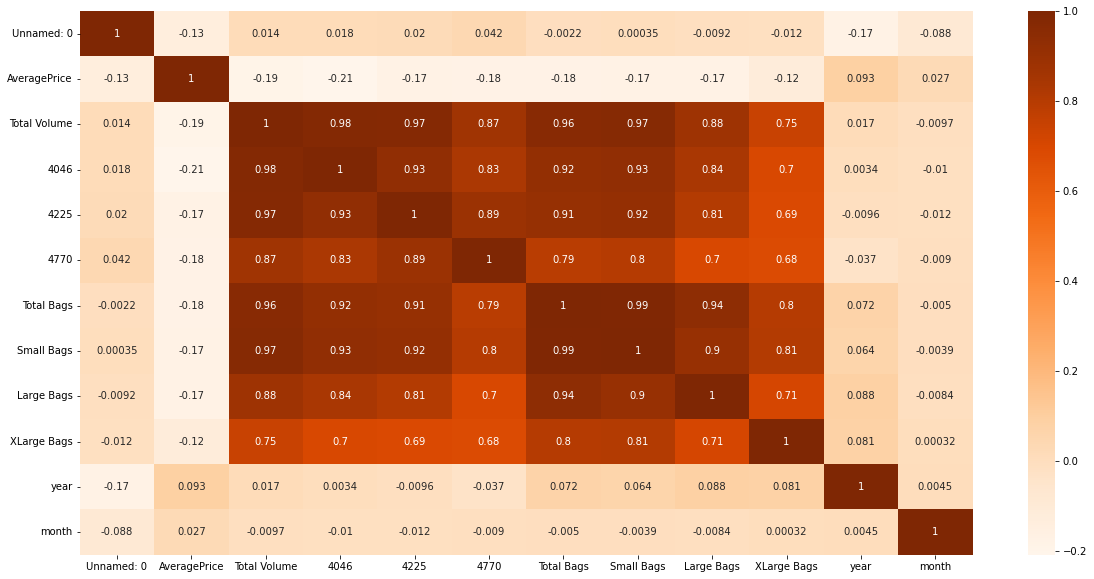

In [21]:
fig=plt.figure(figsize=(20,10))
hc=dataset.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Oranges")

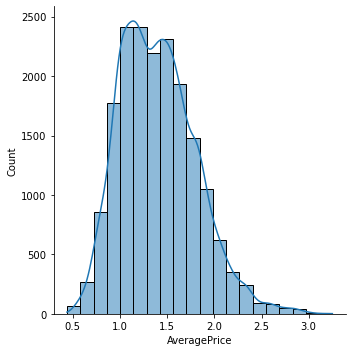

In [22]:
sns.displot(dataset["AveragePrice"],bins=20,kde=True)

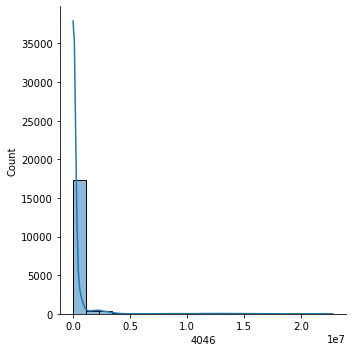

In [23]:
sns.displot(dataset["4046"],bins=20,kde=True)

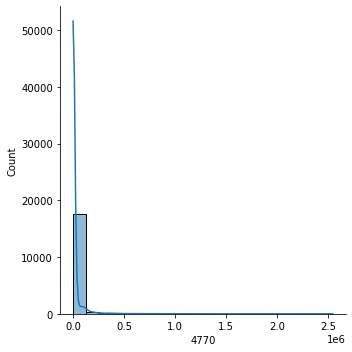

In [24]:
sns.displot(dataset["4770"],bins=20,kde=True)

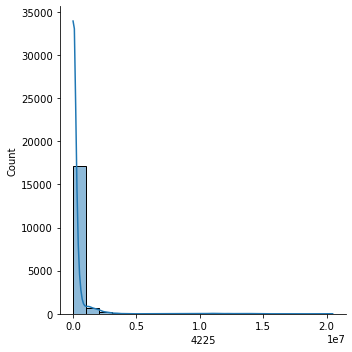

In [25]:
sns.displot(dataset["4225"],bins=20,kde=True)

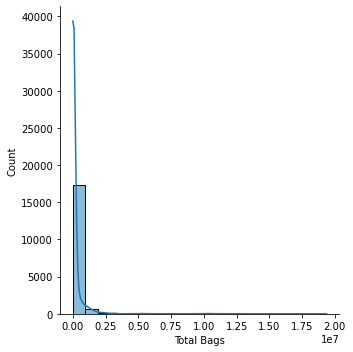

In [26]:
sns.displot(dataset["Total Bags"],bins=20,kde=True)

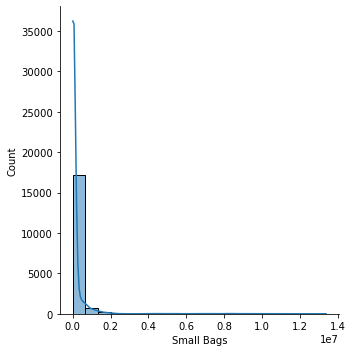

In [27]:
sns.displot(dataset["Small Bags"],bins=20,kde=True)

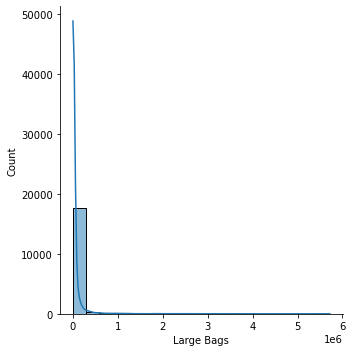

In [28]:
sns.displot(dataset["Large Bags"],bins=20,kde=True)

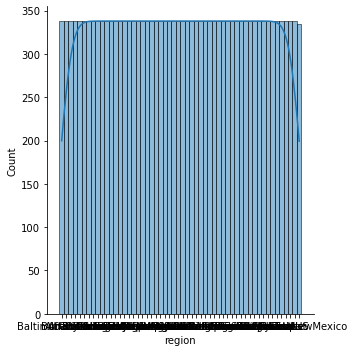

In [29]:
sns.displot(dataset["region"],bins=100,kde=True)

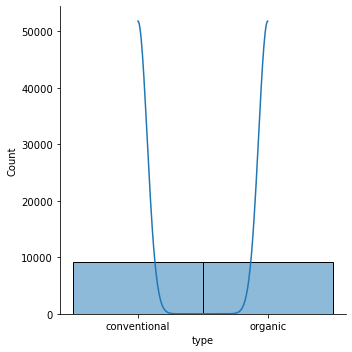

In [30]:
sns.displot(dataset["type"],bins=100,kde=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Comparison between AveragePrice and Total Volume '}, xlabel='AveragePrice', ylabel='Total Volume'>

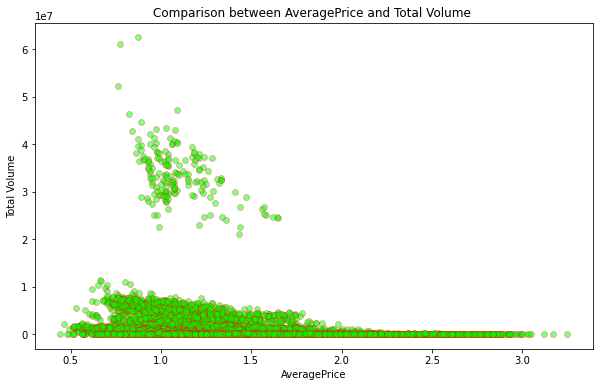

In [31]:
plt.figure(figsize=[10,6])
plt.title("Comparison between AveragePrice and Total Volume ")
sns.scatterplot(dataset["AveragePrice"],dataset["Total Volume"],alpha=0.5,c=(0,1,0),edgecolor="r")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Comparison between AveragePrice and 4046 '}, xlabel='AveragePrice', ylabel='4046'>

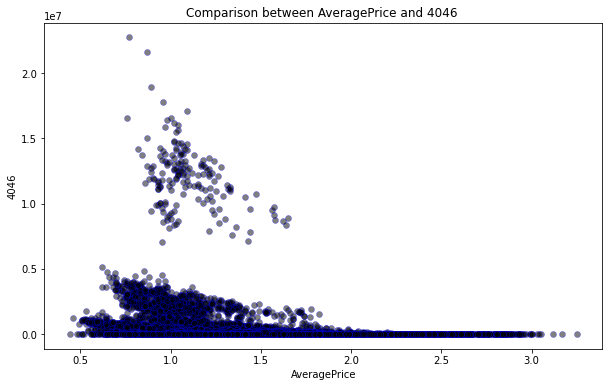

In [32]:
plt.figure(figsize=[10,6])
plt.title("Comparison between AveragePrice and 4046 ")
sns.scatterplot(dataset["AveragePrice"],dataset["4046"],alpha=0.5,c=(0,0,0),edgecolor="b")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Comparison between AveragePrice and XLarge Bags '}, xlabel='AveragePrice', ylabel='XLarge Bags'>

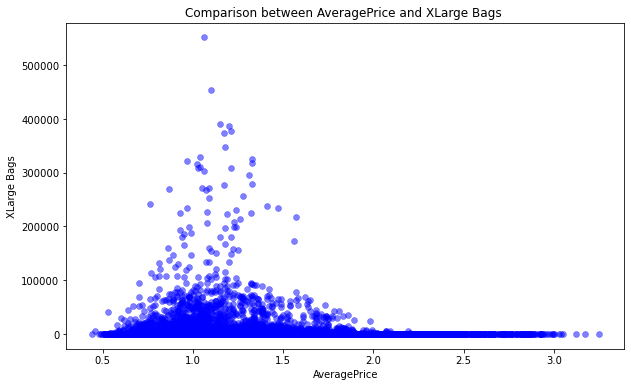

In [33]:
plt.figure(figsize=[10,6])
plt.title("Comparison between AveragePrice and XLarge Bags ")
sns.scatterplot(dataset["AveragePrice"],dataset["XLarge Bags"],alpha=0.5,c=(0,0,1),edgecolor="b")


In [ ]:
sns.pairplot(dataset,hue="AveragePrice")

In [40]:
dataset.dtypes

Unnamed: 0        int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type            float64
year              int64
region          float64
month             int64
dtype: object

# Ordinal Encoding

In [41]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()


In [42]:
for i in dataset.columns:
    if dataset[i].dtypes=="object":
        dataset[i]=enc.fit_transform(dataset[i].values.reshape(-1,1))


In [43]:
dataset.head(50)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0.0,2015,0.0,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0.0,2015,0.0,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0.0,2015,0.0,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0.0,2015,0.0,6
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0.0,2015,0.0,29
5,5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,0.0,2015,0.0,22
6,6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,0.0,2015,0.0,15
7,7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,0.0,2015,0.0,8
8,8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,0.0,2015,0.0,1
9,9,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,0.0,2015,0.0,25


In [44]:
dataset.dtypes

Unnamed: 0        int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type            float64
year              int64
region          float64
month             int64
dtype: object

In [45]:
collist=dataset.columns.values
ncol=10
nrows=50

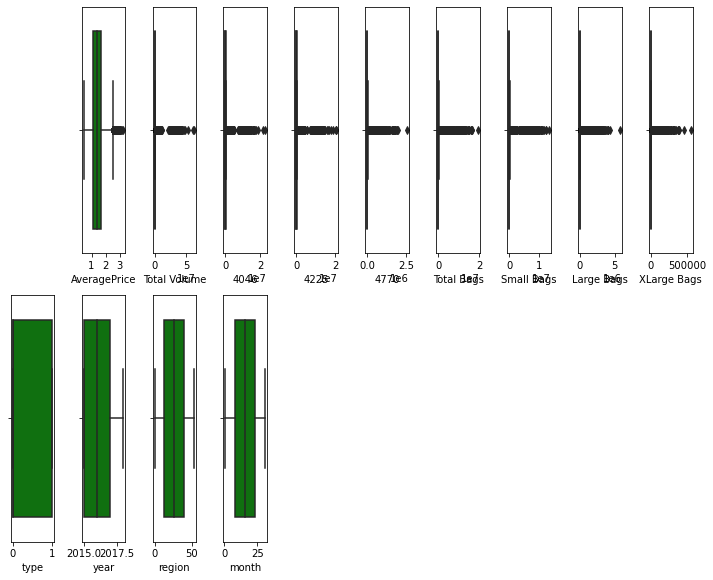

In [46]:
plt.figure(figsize=(ncol,20*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(dataset[collist[i]],color="green",orient="v")
plt.tight_layout()

In [47]:
dataset.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
month            0.014310
dtype: float64

In [48]:
from scipy.stats import zscore

In [49]:
zscr=np.abs(zscore(dataset))
threshold=3
print(np.where(zscr>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([3, 3, 9, ..., 1, 1, 1], dtype=int64))


In [50]:
print("shape before removing the outliers",dataset.shape)
dataset_new=dataset[(zscr<3).all(axis=1)]
print("shape after removing the outliers",dataset.shape)

shape before removing the outliers (18249, 14)
shape after removing the outliers (18249, 14)


In [51]:
Dataloss=((18249-17651)/18249)*100
Dataloss

3.276891884486821

In [52]:
Q1=dataset.quantile(0.25)
Q3=dataset.quantile(0.75)
IQR=Q3-Q1

In [53]:
dataset_new1=dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]

In [54]:
# print("shape before and after")
print("shape before",":",dataset.shape)
print("shape after",":",dataset_new.shape)
print("Percentage loss",":",(dataset.shape[0]- dataset_new1.shape[0])/dataset.shape[0])

shape before : (18249, 14)
shape after : (17651, 14)
Percentage loss : 0.36774617787276015


In [55]:
dataset_new.skew()

Unnamed: 0      0.106116
AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
month           0.011778
dtype: float64

Seperating columns into Independent variables and target variables


In [56]:
x=dataset_new.drop("AveragePrice",axis=1)
y=dataset_new[["AveragePrice"]]


Power transformation Method


In [57]:
from sklearn.preprocessing import power_transform
dataset_new2=power_transform(x)
dataset_new2=pd.DataFrame(dataset_new2,columns=x.columns)


In [58]:

dataset_new2.skew()

Unnamed: 0     -0.243656
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
year            0.227731
region         -0.257799
month          -0.208926
dtype: float64

In [59]:
dataset_new2.shape

(17651, 13)

In [60]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(dataset_new2)
x=pd.DataFrame(x,columns=dataset_new2.columns)

In [61]:
x.head()

,Unnamed: 0,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,-1.966939,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.019047,-1.210618,-2.01059,1.227565
1,-1.790941,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.019047,-1.210618,-2.01059,0.538229
2,-1.646881,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.019047,-1.210618,-2.01059,-0.218959
3,-1.520296,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.019047,-1.210618,-2.01059,-1.094426
4,-1.405299,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.019047,-1.210618,-2.01059,1.415364


In [62]:
x.shape

(17651, 13)

In [63]:
y.shape

(17651, 1)

# Train test split

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13767, 13)
(3884, 13)
(13767, 1)
(3884, 1)


In [66]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score


In [67]:
lr.fit(x_train,y_train)

LinearRegression()

In [68]:
lr.coef_

array([[-0.03720214, -0.30624155,  0.01735465,  0.26524355,  0.02597456,
        -0.24637011,  0.21118135, -0.03372974,  0.00856438,  0.18380089,
         0.07263576,  0.01368121,  0.00610436]])

In [69]:
lr.score(x_train,y_train)

0.5358146294544249

In [70]:
for i in range(0,100):
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state{i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("\n")

At random state0,the training accuracy is :- 0.5358146294544249
At random state0,the testing accuracy is :- 0.5378880763671696


At random state1,the training accuracy is :- 0.5358146294544249
At random state1,the testing accuracy is :- 0.5378880763671696


At random state2,the training accuracy is :- 0.5358146294544249
At random state2,the testing accuracy is :- 0.5378880763671696


At random state3,the training accuracy is :- 0.5358146294544249
At random state3,the testing accuracy is :- 0.5378880763671696


At random state4,the training accuracy is :- 0.5358146294544249
At random state4,the testing accuracy is :- 0.5378880763671696


At random state5,the training accuracy is :- 0.5358146294544249
At random state5,the testing accuracy is :- 0.5378880763671696


At random state6,the training accuracy is :- 0.5358146294544249
At random state6,the testing accuracy is :- 0.5378880763671696


At random state7,the training accuracy is :- 0.5358146294544249
At random state7,the testing accu

At random state68,the training accuracy is :- 0.5358146294544249
At random state68,the testing accuracy is :- 0.5378880763671696


At random state69,the training accuracy is :- 0.5358146294544249
At random state69,the testing accuracy is :- 0.5378880763671696


At random state70,the training accuracy is :- 0.5358146294544249
At random state70,the testing accuracy is :- 0.5378880763671696


At random state71,the training accuracy is :- 0.5358146294544249
At random state71,the testing accuracy is :- 0.5378880763671696


At random state72,the training accuracy is :- 0.5358146294544249
At random state72,the testing accuracy is :- 0.5378880763671696


At random state73,the training accuracy is :- 0.5358146294544249
At random state73,the testing accuracy is :- 0.5378880763671696


At random state74,the training accuracy is :- 0.5358146294544249
At random state74,the testing accuracy is :- 0.5378880763671696


At random state75,the training accuracy is :- 0.5358146294544249
At random state75,

In [71]:
pred=lr.predict(x_test)
print("Predicted result : ",pred)
print("actual result",y_test)

Predicted result :  [[1.50298427]
 [1.29331232]
 [1.01495203]
 ...
 [1.3399007 ]
 [1.02422936]
 [1.67285308]]
actual result        AveragePrice
8959           1.14
9794           1.40
3452           1.14
4203           0.88
13673          1.82
...             ...
3278           0.77
18219          1.56
3232           2.07
1853           1.03
11721          1.65

[3884 rows x 1 columns]


In [72]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
preddtr
dtr.score(x_train,y_train)


1.0

# Support vector regressor and its accuracy score

In [73]:
from sklearn.svm import SVR
sv=SVR()
sv.fit(x_train,y_train)
predsv=dtr.predict(x_test)
predsv
sv.score(x_train,y_train)

0.8078592807207654

In [74]:
print(r2_score(y_test,pred))

0.5378880763671696


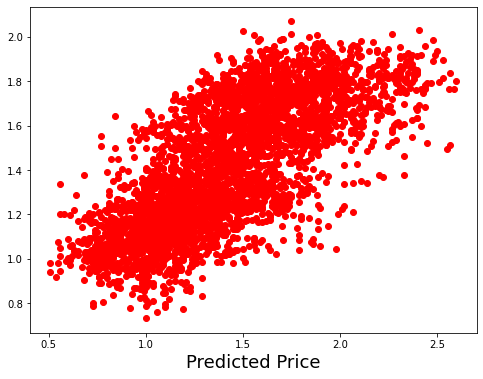

In [77]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color="r")
plt.xlabel("Actual Price",fontsize=14)
plt.xlabel("Predicted Price",fontsize=18)
plt.show()

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [78]:
parameters={"alpha":[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [79]:
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [80]:
ls=Lasso(alpha=.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.5379125589162336

In [81]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.16651569887169804

In [82]:
parameters={"alpha":[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [83]:
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [84]:
rd=Ridge(alpha=1,random_state=0)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)

rdr=r2_score(y_test,pred_rd)
rdr

0.5378874317105485

In [85]:
cv_score=cross_val_score(rd,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean


0.1671697771599134

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)

In [88]:
rfs=r2_score(y_test,pred_rf)
print("R2 score : ",rfs*100)

R2 score :  88.73039933177509


In [89]:
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()

KeyboardInterrupt: 

In [90]:
print("Cross Val Score : ",rfs*100)

Cross Val Score :  88.73039933177509


In [91]:
from sklearn.ensemble import AdaBoostRegressor

In [92]:
ad=AdaBoostRegressor(n_estimators=100)
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
pred_ad=ad.predict(x_test)

ads=r2_score(y_test,pred_ad)

In [93]:
    print("R2 score : ",ads*100)

R2 score :  53.40642570184231


In [94]:
adscore=cross_val_score(ad,x,y,cv=5)
adc=adscore.mean()


KeyboardInterrupt: 

In [95]:
print("Cross Val Score : ",ads*100)

Cross Val Score :  53.40642570184231


# Cross validation

In [97]:
score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.mean())

[-0.13652442  0.0987254   0.42175095  0.22999312  0.22243061]
0.16727513167939448


In [98]:
score=cross_val_score(sv,x,y,cv=5)
print(score)
print(score.mean())

KeyboardInterrupt: 

In [99]:
score=cross_val_score(dtr,x,y,cv=5)
print(score)
print(score.mean())

[-1.27280118  0.19426451  0.1724899  -0.47322568 -0.30679914]
-0.3372143193607472


In [100]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())


KeyboardInterrupt: 

In [101]:
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())

KeyboardInterrupt: 

In [102]:
import pickle
filename="Avocado.pkl"
pickle.dump(lr,open(filename,"wb"))

# Conclusion


In [103]:
loaded_model=pickle.load(open("Avocado.pkl","rb"))
result=loaded_model.score(x_test,y_test)


In [104]:
print(result)

0.5378880763671696
